# 지도(Supervised) 학습-범주형인 분류 문제

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [2]:
import numpy as np

In [3]:
fish_data=np.column_stack((fish_length,fish_weight))

In [4]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


## 라벨 데이터

In [5]:
fish_target=np.concatenate((np.ones(35),np.zeros(14)))

In [6]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target, random_state=42)

'''
index=np.arange(49)
np.random.shuffle(index) 
'''
#위의 과정이 필요없이 알아서 랜덤하게 돌려준다.
#밑의 식과 다르게 stratify=fish_target을 설정해주지 않았다.
#random_state=42은 여러 PC로 돌려도 같은 값이 나온다.

'\nindex=np.arange(49)\nnp.random.shuffle(index) \n'

In [9]:
train_input.shape

(36, 2)

In [10]:
test_input.shape

(13, 2)

In [11]:
train_target.shape

(36,)

In [12]:
test_target.shape

(13,)

In [13]:
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

## 데이터분포를 반영한 분할

In [15]:
train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target,stratify=fish_target, random_state=42)
'''
index=np.arange(49)
np.random.shuffle(index) 
'''
#위의 과정이 필요없이 알아서 랜덤하게 돌려준다.
#위의 식과 다르게 stratify=fish_target을 설정해주었다.
#random_state=42은 여러 PC로 돌려도 같은 값이 나온다.

'\nindex=np.arange(49)\nnp.random.shuffle(index) \n'

In [16]:
train_input.shape

(36, 2)

In [17]:
train_target.shape

(36,)

In [18]:
test_input.shape

(13, 2)

In [19]:
test_target.shape

(13,)

In [20]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [21]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

## 도미 데이터 : 길이 25, 무게 150에 대한 분류 결과는?

In [22]:
import matplotlib.pyplot as plt

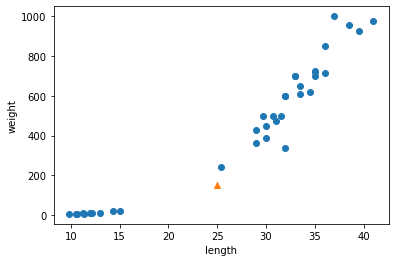

In [23]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')      #length=25,weight=150인것을 찍어라.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

###### 데스트할 도미데이터와 이웃하는 데이터들

In [24]:
dist,idx=kn.kneighbors([[25,150]])

In [25]:
print(dist)  #[25,150]과 떨어진 것 중 가까운 것 5개의 직선거리를 구해준다.

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [26]:
print(idx)   #[25,150]과 떨어진 것 중 가까운 것 5개의 순서를 구해준다.

[[21 33 19 30  1]]


In [27]:
train_input[idx]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

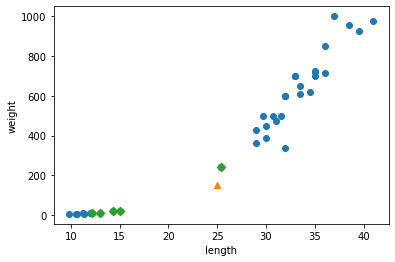

In [28]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')      #length=25,weight=150인것을 찍어라.
plt.scatter(train_input[idx,0],train_input[idx,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [29]:
print(train_target[idx])

[[1. 0. 0. 0. 0.]]


In [30]:
print(dist)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


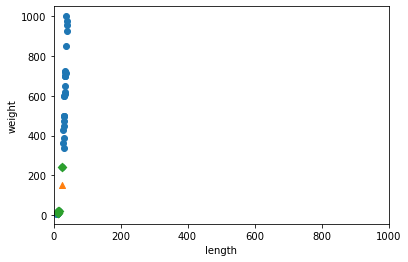

In [31]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')      #length=25,weight=150인것을 찍어라.
plt.scatter(train_input[idx,0],train_input[idx,1],marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

###### length 보다는 weight가 영향이 크다.

 ## 두 변수의 스케일을 갖게 = 정규분포화

In [32]:
mean=np.mean(train_input,axis=0)
print(mean)

[ 27.29722222 454.09722222]


In [33]:
std=np.std(train_input,axis=0)
print(std)

[  9.98244253 323.29893931]


In [34]:
train_scaled=(train_input-mean) / std
print(train_scaled[:10])

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]]


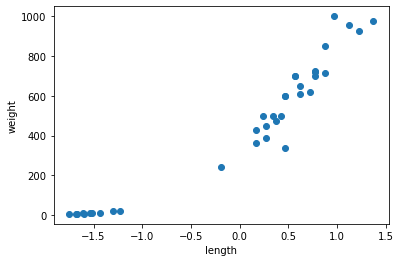

In [35]:
plt.scatter(train_scaled[:,0],train_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [36]:
new=([25,150]-mean)/std
print(new)

[-0.23012627 -0.94060693]


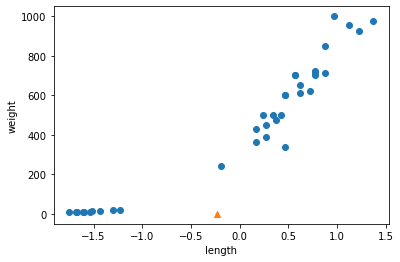

In [37]:
plt.scatter(train_scaled[:,0],train_input[:,1])
plt.scatter(new[0],new[1],marker='^')      #length=25,weight=150인것을 찍어라.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [38]:
kn.fit(train_scaled,train_target)

KNeighborsClassifier()

In [39]:
test_scaled=(test_input-mean)/std

In [40]:
kn.score(test_scaled,test_target)

1.0

In [41]:
kn.predict([new])

array([1.])

In [42]:
kn.kneighbors([new])

(array([[0.2873737 , 0.7711188 , 0.89552179, 0.91493515, 0.95427626]]),
 array([[21, 14, 34, 32,  5]], dtype=int64))

In [43]:
dist,idx=kn.kneighbors([new])
print(dist,idx)

[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]] [[21 14 34 32  5]]


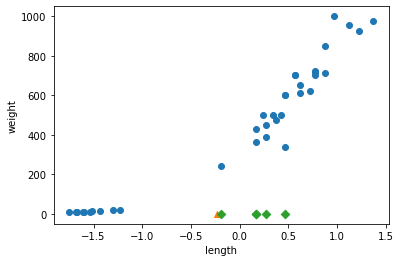

In [44]:
plt.scatter(train_scaled[:,0],train_input[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[idx,0],train_scaled[idx,1],marker='D')      #length=25,weight=150인것을 찍어라.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()